In [23]:
import pandas as pd
import os
import datetime
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

<AxesSubplot:xlabel='Period'>

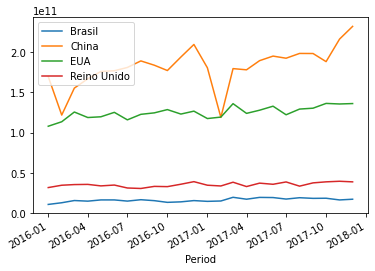

In [24]:
files = ["Brazil.csv", "China.csv", "USA.csv", "United Kingdom.csv"]
names = ["Brasil", "China", "EUA", "Reino Unido"]

def fix_y_label(y):
  period = str(y)
  year = int(period[:-2])
  month = int(period[-2:])

  if month > 12:
    year += 1
    month = month - 12

  return datetime.datetime(year, month, 1)

def get_df(df):
	df["Period"] = df["Period"].apply(fix_y_label)
	df = df.loc[df["Trade Flow"] == "Exports"]
	df = df.loc[df["Period"] > datetime.datetime(2015, 12, 31)]
	df.drop(columns=df.columns.difference(['Period','Trade Value (US$)']), axis=1, inplace=True)

	return df.set_index("Period")

joined_df = None

for file in files:
	df = pd.read_csv(f"data/{file}")
	df = get_df(df)

	df.rename(columns={"Trade Value (US$)" : names[files.index(file)]}, inplace=True)

	if joined_df is None:
		joined_df = df
	else:
		joined_df = joined_df.merge(df, how="inner", on="Period")

# brazil_df = pd.read_csv("data/Brazil.csv")
# brazil_df = get_df(brazil_df)

# brazil_df.head()
joined_df.plot(x="Valor Total de Negociações", y="Período")